# Proyecto de Cluster y Clasificación
#### Fuente del conjunto de datos: 
El dataset fue extraído de: [UCI Machine Learning Repository](https://www.kaggle.com/shishir349/mall-customers-clustering-analysis/data)


---

## CLASIFICACION DE CLIENTES EN COMERCIO
---
Cuando realiza la segmentación de clientes, se encuentra características similares en el comportamiento y las necesidades de cada uno. Posteriormente, se generalizan en grupos para satisfacer demandas con diversas estrategias:

* Actividades de marketing dirigidas a grupos específicos
* Lanzamiento de características que se alinean con la demanda del cliente
* Desarrollo de la hoja de ruta del producto.

Realizaremos Machine Lerning no supervisado con Python para generar una comprensión básica de cómo podemos segmentar datos en grupos particulares y encontrar información valiosa a partir de ellos.


## Resumen
---
1. Diccionario de Variables
2. Data Acquisition y análisis del dataset
3. Data visualization
4. Data Wrangling
5. Implementacion de algoritmos no supervisados
6. Agrupación usando K-Means
7. Selección de Clústeres.
8. Trazado del límite del clúster y los clústeres.
9. Gráfico 3D de clústeres.

### 1. Diccionario de variables ###
---
    
    
* **CustomerID:** ID identificatorio del cliente
* **Gender:** Genero del cliente
* **Annual Income (k USD):** Ingreso anual de los clientes en miles de dolares
* **Spending Score (1-100):** Nivel de gasto del cliente en porcentaje de su sueldo

### 2. Data Acquisition y análisis del dataset
---
#### *Importacion de Librerias para el desarrollo*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import AgglomerativeClustering
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from collections import Counter

plt.style.use('fivethirtyeight')

*__Importamos Dataset en Formato CSV mediante el uso de la libreria de pandas__*

In [4]:
df = pd.read_csv ('Mall_Customers.csv')

*__Comenzamos a analizar la distribución y tipo de variables de nuestros datos__*

    Vemos las primeras 5 entradas de nuestros datos

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


    Vemos la distribución del dataset entre filas y columnas

In [6]:
print (df.shape)

(200, 5)


    Vemos la cantidad de datos de cada variable y su tipo de de dato

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


    Vemos la distribución de las variables numericas

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


    El tipo de dato de cada variable aisladamente

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

    Contamos la existencia de variables nulas

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3. Data Visualization  

---
#### A - Univariado: Procedemos a realizar un analisis del set de datos para entender la informacion con la que contamos variable por variable


In [11]:
d= pd.DataFrame(df['Gender'].value_counts())
fig = px.pie(d ,values='Gender',names=['Femenino','Masculino'],hole=0.4,opacity=0.7)

fig.add_annotation(text='Genero',
                   x=0.5,y=0.5,showarrow=False,font_size=18,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Ratio de Genero',x=0.5,y=0.98),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

*  _Vemos en este grafico que la distribucion entre sexo es pareja pero evidenciamos un 12% mas de concurrencia del genero femenino que del masculino_

---
>Realizamos una serie de histogramas de las variables y acotamos las conclusiones por cada una 
---

C:\Users\MegaTecnologia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



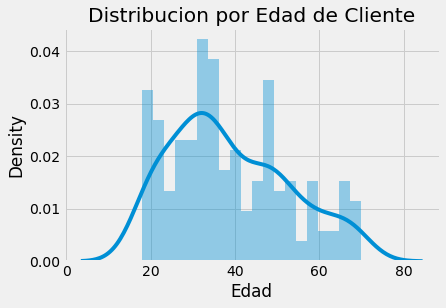

In [12]:
#Generamos Displot para la edad de los clientes 
b = sns.distplot(x= df['Age'] , bins=20)
b.set_title ('Distribucion por Edad de Cliente')
b.set_xlabel ('Edad')
plt.show()

*  _Vemos una distribucion asimetrica con mayor concentracion a la izquierda entre personas de 20 a 40 años_

C:\Users\MegaTecnologia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



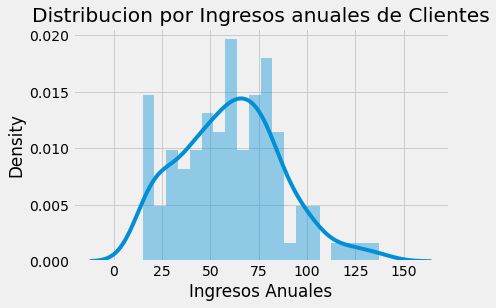

In [13]:
#Generamos Displot para inglesos anuales de los clientes 
b = sns.distplot(x= df['Annual Income (k$)'] , bins=20)
b.set_title ('Distribucion por Ingresos anuales de Clientes')
b.set_xlabel ('Ingresos Anuales')
plt.show()

*  _Vemos una grafica asimetrica con sesgo hacia la derecha, ya que se concentran muchos clientes con ingresos anuales entre 50K usd y 75K usd_

C:\Users\MegaTecnologia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



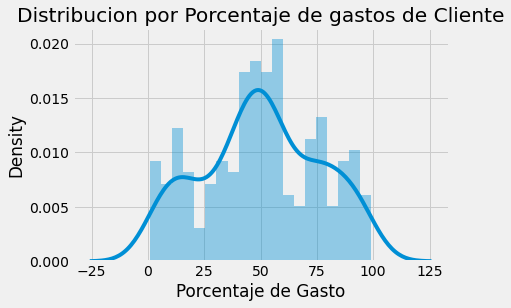

In [14]:
#Generamos Displot para la porcentaje de gasto de los clientes 
b = sns.distplot(x= df['Spending Score (1-100)'] , bins=20)
b.set_title ('Distribucion por Porcentaje de gastos de Cliente')
b.set_xlabel ('Porcentaje de Gasto')
plt.show()

*  _Vemos una grafica simetrica con una mayor concentracion de datos entre un 30% y 60%_

---
#### B - Bivariado: Procedemos a realizar un analisis del set de datos vinculando variables para entender su relacion 


C:\Users\MegaTecnologia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



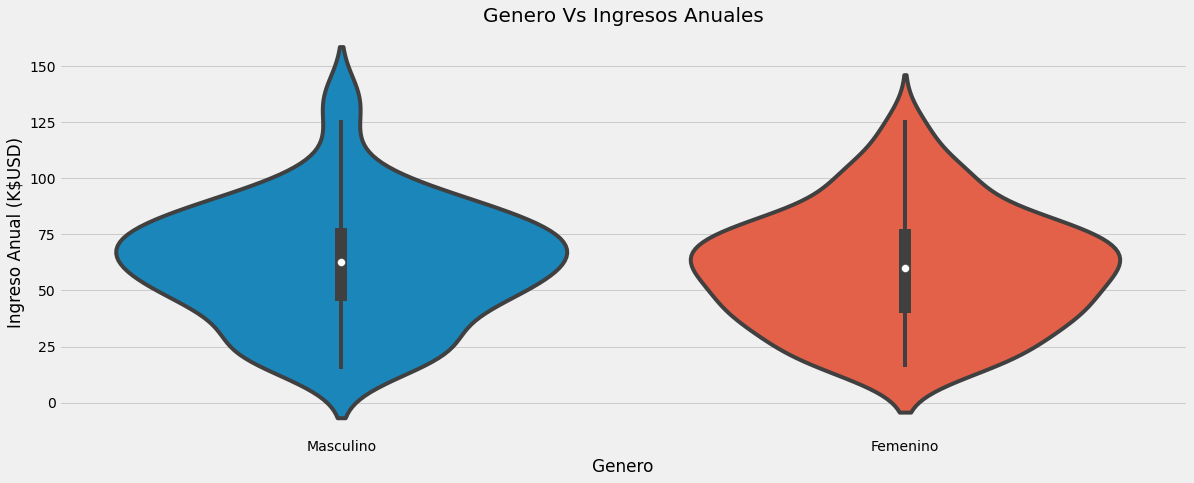

In [15]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['Gender'], df['Annual Income (k$)'])
plt.title('Genero Vs Ingresos Anuales', fontsize = 20)
plt.xlabel ('Genero')
plt.ylabel ('Ingreso Anual (K$USD)')
plt.xticks ([0,1],['Masculino' , 'Femenino'])
plt.show()

*  _Podemos obtener la clunclusion de que los hombres que realizan compras tienen un ingreso medio mayor que las mujeres. Tambien podemos evidenciar una mayor concentracion de hombres con ingresos altos en comparacion a las mujeres_
---

C:\Users\MegaTecnologia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



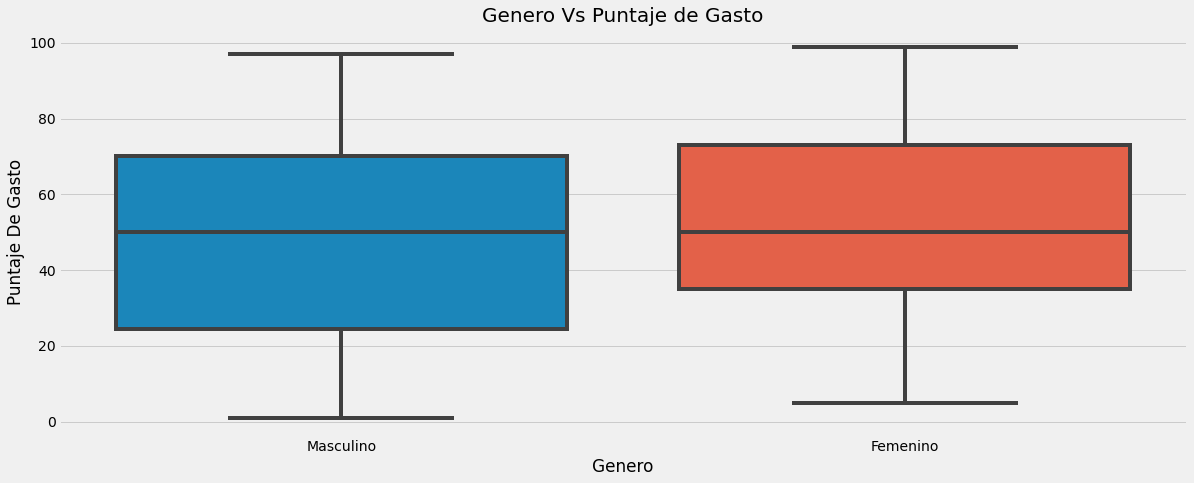

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(df['Gender'], df['Spending Score (1-100)'])
plt.title('Genero Vs Puntaje de Gasto', fontsize = 20)
plt.xlabel ('Genero')
plt.ylabel ('Puntaje De Gasto')
plt.xticks ([0,1],['Masculino' , 'Femenino'])
plt.show()

*  _Vemos que la Mediana entre ambos generos es similar, pero , se evidencian puntajes de gastos mas altos para el genero femenino. No se evidencian Outliers por lo que afirmamos una buena distribucion de los datoss_
---

In [17]:
fig = px.scatter (data_frame=df , x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                  color='Gender')

fig.update_layout(
    title='Ingresos Anuales Vs Puntaje de Gasto  ,  Dividido por genero',
    xaxis_title='Ingreso Anual (K$USD)',
    yaxis_title='Porcentaje de Gasto',
    legend_title="Genero")

fig.show()

 _**Podemos visualizar una serie de grupos bien definidos dentro de la visual**_
 
 * **Bajo Ingresos:** Hay un porcentaje que tiene un score de gasto bajo y otro alto
 * **Medio Ingreso:** Aqui se define un nucleo de gasto mas concentrado, podemos hablar de un solo Clusster
 * **Alto Ingreso:** Aqui podemos ver 2 grupos pero ya mas disperso entre gente que gasta mucho y otros que gastan poco, pero el score de gasto no se nuclea como vemos con ingresos medios
 
 
#### De aquí diferenciamos 5 grupos bien definidos que veremos luego para la clasificación
---

**__C - MULTIVARIADO: Generamos un PairPlot para poder ver la correlacion entre los datos, de esta manera vamos a identificar relaciones mas lineales entre variables y a su vez visualizar mejor la Clusterizacion de los datos__**

Agregamos una separacion por genero para identificar una 3er variable en la visualizacion

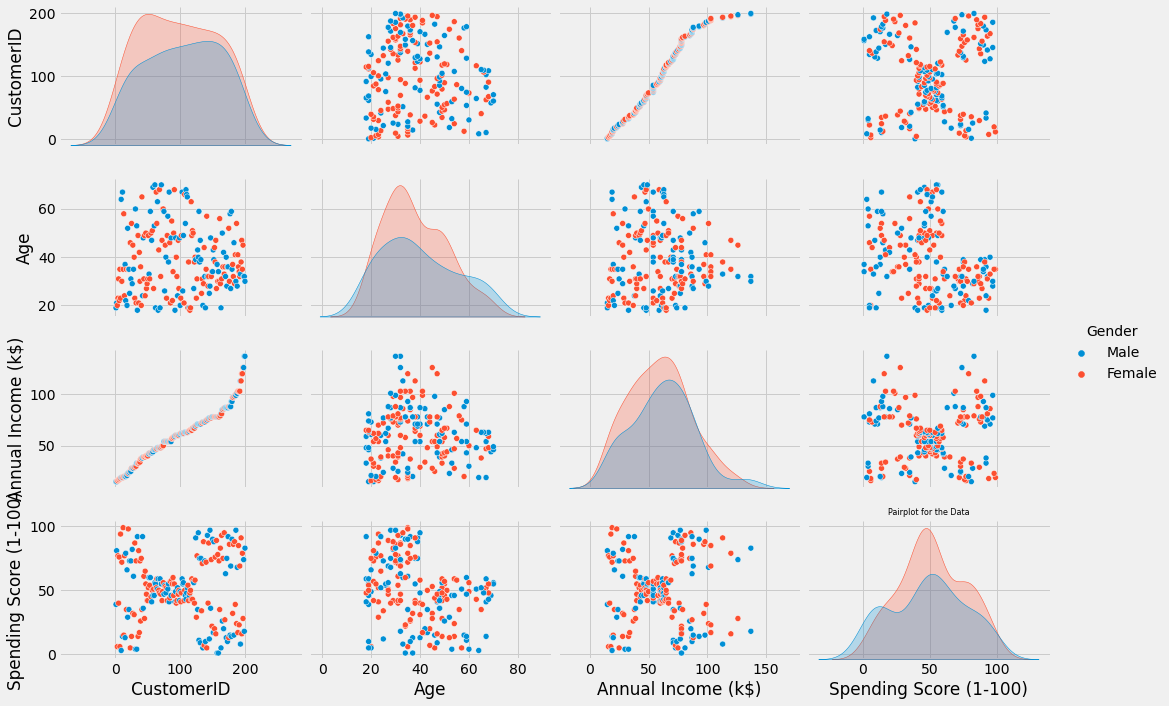

In [18]:
#plt.figure (figsize= (20 , 3))
sns.pairplot(df ,aspect=1.5 , hue='Gender')
plt.title('Pairplot for the Data', fontsize = 8)
plt.show()

* **Conclusion:** Tenemos una vista mas panoramica, de aquellas variables con relaciones mas lineales y de las variables que tienen una clusterizacion mas evidente. Por ejemplo , Ingreso Anual Vs Puntaje de gasto --> se evidencia 5 clusters de manera clara para poder aplicarle algoritmos de machine lerning posteriormente
---

<AxesSubplot:>

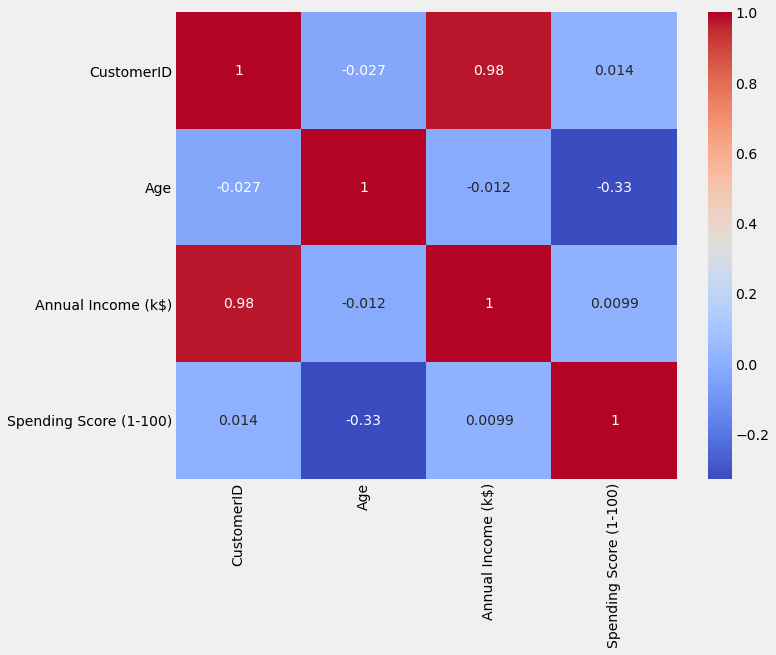

In [19]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

---

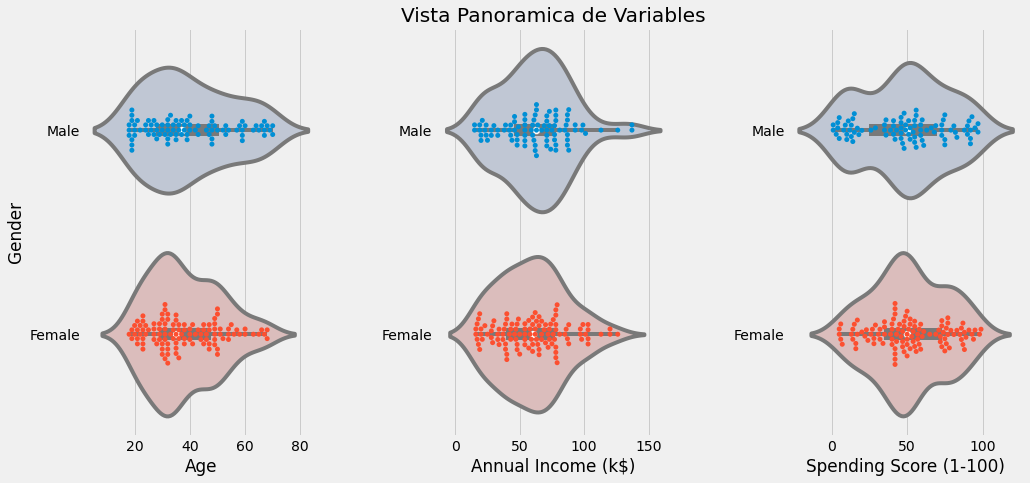

In [20]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Vista Panoramica de Variables' if n == 2 else '')
plt.show()

In [74]:
fig = px.scatter(df, y="Age", x="Annual Income (k$)", 
                 color='Spending Score (1-100)',
                 size='Spending Score (1-100)')

fig.update_layout(
    title='Edad Vs Ingresos Anuales con Puntaje de Gasto',
    xaxis_title='Ingreso Anual (K$USD)',
    yaxis_title='Edad',
    legend_title="Puntaje de Gasto")


fig.show()

_**AQUI EL ANALISIS TOMA UN FOCO MUY INTERESANTE, se ve una relacion clara entre las personas jovenes y su puntaje de gasto en comparacion con los adultos mayores**_
 
 * **A - Jovenes De Bajos Ingresos:** Este grupo tiene un nivel de gasto elevado, algunos casos del orden de los 100 puntos
 * **B - Adultos De Bajos Ingresos:** Se evidencia una drastica disminucion de su nivel de gasto
 * **C - Adultos y Jovenes De Medios Ingresos:** Este grupo tiene un porcentaje de gasto muy similar en todo su rango etareo 
 * **D - Jovenes de Altos Ingresos:** Este grupo posee un nivel de gasto muy alto al igual que el grupo A
 * **E - Adultos De Altos Ingresos:** Dato interesante, se repite el patron del GrupoB a pesar de contar con ingresos muy distintos 
 
---

### 4. Data Wrangling
---

*    A - Agregamos una Variable INT Dicotomica basado en la variable Gender, colocando 0 = MASCULINO   y   1 = FEMENINO

In [22]:
# Aplicamos una funcion Lambda para dar la condicion explicada en el titulo
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


*    B - A la variable X le damos el DataFrame sin la columna CustomerID por que no la utilizaremos en el analisis

In [23]:
x = df.drop('CustomerID',axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### 5. Implementacion de Algoritmo NO Supervisado

---
**Para obtener la variable categorica y posteriormente hacer una clasificación utilizaremos el algoritmo KMeans**

---

*    A - Importamos libreria KMeans

In [24]:
from sklearn.cluster import KMeans

*    B - Buscamos la cantidad de clusters óptima para nuestro análisis

C:\Users\MegaTecnologia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



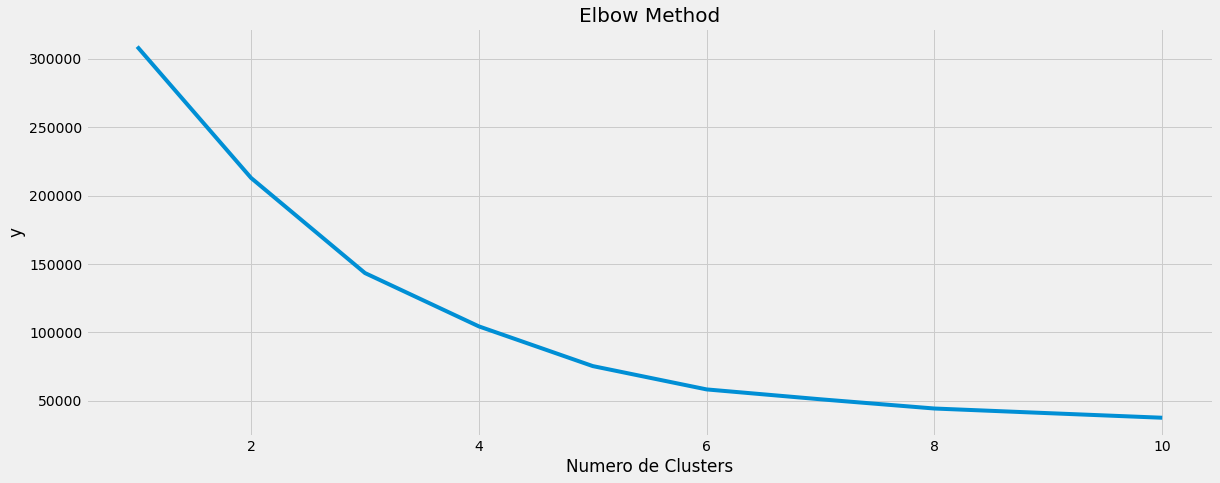

In [25]:
y = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    y.append(km.inertia_)
    
plt.plot(range(1, 11), y)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Numero de Clusters')
plt.ylabel('y')
plt.show()

**Como vimos en el gráfico de las variables "Anual Income" y "Spending Socore" anteriormente con los 5 grupos y aquí, podemos trabajar con 5 clusters de forma óptima**

*    C - Definimos la variable para utilizar nuestro modelo con los datos que usaremos y entrenamos nuestro modelo

In [26]:
# x = df.drop('CustomerID',axis=1) (Código usado anteriormente para definir "x")
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(x)

*    D - Guardamos el agrupamiento de nuestras clases en la variable "labels"

In [27]:
labels = kmeans.predict(x)

*    E - Guardamos nuestra variable categorica en nuestro DataFrame

In [29]:
df['Clase'] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clase
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


*    E - Visualizamos nuestros datos agrupados en cada una de las clases

In [73]:
fig = px.scatter (data_frame=df , x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                  color='Clase')

fig.update_layout(
    title='Ingresos Anuales Vs Puntaje de Gasto por Clase',
    xaxis_title='Ingreso Anual (K$USD)',
    yaxis_title='Porcentaje de Gasto',
    legend_title="Genero")

fig.show()

In [75]:
# import plotly.graph_objs as go
# import plotly.offline as py
# trace1 = go.Scatter3d(
#     x= df['Age'],
#     y= df['Spending Score (1-100)'],
#     z= df['Annual Income (k$)'],
#     mode='markers',
#      marker=dict(
#         color = df['Clase'], 
#         size= 10,
#         line=dict(
#             color=df['Clase'],
#             width= 12
#         ),
#         opacity=0.7
#      )
# )
# df_trace = [trace1]

# layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0  
#     ),
#     scene = dict(
#             xaxis = dict(title  = 'Age'),
#             yaxis = dict(title  = 'Spending Score'),
#             zaxis = dict(title  = 'Annual Income')
#         )
# )

# fig = go.Figure(data = df_trace, layout = layout)
# py.iplot(fig)

**Como conclusión podemos ver bien definidos cada uno de nuestros 5 grupos de clientes, que vimos anteriormente, pero esta vez definidos por sus clases**
**Igual que anteriormente notamos:** 

**Clase "0":** Ingresos bajos - Gasto bajo

**Clase "1":** Ingresos bajos - Gasto alto

**Clase "2":** Ingresos altos - Gasto bajo

**Clase "3":** Ingresos altos - Gasto alto

**Clase "4":** Ingresos medios - Gasto medio

---
**1. Random Forest**

---

* A - Importamos librerias para utilizar Random Forest

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

* B - Definimos las variables X, y para nuestro modelo

In [32]:
X = df.drop(['CustomerID','Clase'],axis=1)
y = df['Clase']

* C - Dividimos nuestros datos para entrenamiento y prueba (train y test)

In [33]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size=0.20, random_state=0)

* D - Definimos nuestro modelo y lo entrenamos

In [34]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

* E - Probamos el acierto de nuestro modelo

In [35]:
y_test_pred = random_forest.predict(X_test) #Prediccion en Test
y_test_pred

array([2, 1, 2, 4, 1, 4, 2, 1, 2, 2, 2, 0, 3, 0, 3, 0, 4, 2, 2, 0, 3, 2,
       3, 3, 3, 1, 1, 2, 4, 2, 2, 1, 1, 2, 2, 3, 1, 0, 2, 2])

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))


[[ 5  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  4]]


In [37]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 1.0


**Al ser datos muy definidos y al ser Random Forest un modelo tan potente, en este caso da un porcentaje del 100% de aciertos en la predicción de nuestras clases**

In [38]:
from sklearn.metrics import precision_score

test_presicion = precision_score(y_test, y_test_pred, average = 'macro')

print('% de precisión sobre el set de evaluación:',test_presicion)

% de precisión sobre el set de evaluación: 1.0


In [39]:
from sklearn.metrics import recall_score
test_recall = recall_score(y_test, y_test_pred, average = 'macro')
print('% de recall sobre el set de evaluación:',test_recall)

% de recall sobre el set de evaluación: 1.0


In [40]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_test, y_test_pred, average = 'macro')
print('% de "F1 score" sobre el set de evaluación:',test_f1)

% de "F1 score" sobre el set de evaluación: 1.0


---
**2. K-nearest neighbors**

---

* A - Ya tenemos importadas las librerias para utilizar K-Nearest Neighbors. Procedemos a definir las variables X, y para nuestro modelo y dividimos nuestros datos para entrenamiento y prueba (train y test)

In [41]:
# Vamos a tomar la informacion, definimos variables Target y generamos datos de entrenamiento
X = df.drop(['CustomerID','Clase'],axis=1)
y = df['Clase']

#aplicamos la funcion Train_test_Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* B - Definimos nuestro modelo y lo entrenamos

In [42]:
#Cargamos El modelo y le pasamos los datos de entrenamiento y de Testeo
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier()

* C - Probamos el acierto de nuestro modelo

In [43]:
print("% de aciertos de nuestro entrenamiento(train): {}".format(knn.score(X_train,y_train)))
print("% de aciertos de nuestra prueba(test): {}".format(knn.score(X_test,y_test)))

% de aciertos de nuestro entrenamiento(train): 0.96875
% de aciertos de nuestra prueba(test): 0.975


**En este caso KNN tiene menos precisión que Random Forest debido a sus diferencias al clasificar los datos. Aún así tiene alta precisión en entrenamiento (96,87%) y tambien en prueba (97,5%) por lo que funciona de manera correcta**

---
## Conclusión:
### Pudimos segmentar a nuestros clientes en 5 grupos bien definidos según lo visto y analizado en nuestros datos.
#### Nuestro mejor modelo de agrupamiento utilizado fue KMeans y el mejor modelo de clasificasión utilizado fue Random Forest
---

# Optimización de modelos
### En este caso tenemos el modelo Random Forest que para nuestros datos da un acierto del 100% pero para fines de usar optimizaciones de modelos vamos a hacerlo con nuestro modelo de KNN

---
**GridSearchCV**

---


Importamos

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Definimos los hiperparámetros y utilizamos la grilla definida

In [51]:
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

model_grid = GridSearchCV(knn, param_grid=param_grid, cv=5)

Entrenamos nuestro modelo de KNN con la grilla ya definida y CV con tamaño de Fold=5

In [52]:
%%time

model_grid.fit(X_train, y_train)

Wall time: 5.14 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

Vemos las mejores opciones de hiperparametros

In [53]:
print("Mejores parametros: "+str(model_grid.best_params_))
print("Mejor Score: "+str(model_grid.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Mejor Score: 0.9800000000000001



In [54]:
scores = pd.DataFrame(model_grid.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002600,0.000490,0.003000,0.000002,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.933333,1.0,1.0,0.966667,1.0,0.98,0.026667,1
1,0.002601,0.000801,0.002200,0.000399,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.933333,1.0,1.0,0.966667,1.0,0.98,0.026667,1
2,0.002401,0.000491,0.003200,0.000399,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61
3,0.002800,0.000748,0.002401,0.000490,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.933333,1.0,1.0,0.966667,1.0,0.98,0.026667,1
4,0.002600,0.000800,0.004000,0.000895,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.002401,0.000490,0.003000,0.000632,kd_tree,10,7,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61
176,0.002401,0.000490,0.003799,0.000748,kd_tree,10,8,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61
177,0.002200,0.000401,0.002401,0.000491,kd_tree,10,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61
178,0.002400,0.000490,0.002800,0.000749,kd_tree,10,9,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.866667,1.0,1.0,0.933333,1.0,0.96,0.053333,61


Vemos las predicciones

In [55]:
prediction = model_grid.predict(X_test)

In [56]:
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.98


In [57]:
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[ 8  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  1  9  0]
 [ 0  0  0  0  5]]


**Vemos que funciona mejor con estos parametros el modelo de KNN que pasa de 96% de entrenamiento y 97% de prueba a 98% con GridSearch. En conclusión mejora poco y aumenta bastante el tiempo de ejecución teniendo en cuenta lo sencillo de los datos**

---
**RandomSearch**

---

Hacemos los mismos pasos que con GridSearch

In [58]:
from sklearn.model_selection import RandomizedSearchCV

In [59]:
param_dist = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

model_random = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0, cv=5)

In [60]:
%%time

model_random.fit(X_train, y_train)

Wall time: 2.83 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': [1, 3, 5, 7, 10],
                                        'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [61]:
print("Mejores parametros: "+str(model_random.best_params_))
print("Mejor Score: "+str(model_random.best_score_)+'\n')

Mejores parametros: {'weights': 'uniform', 'n_neighbors': 1, 'leaf_size': 10, 'algorithm': 'kd_tree'}
Mejor Score: 0.9800000000000001



In [62]:
scores_random = pd.DataFrame(model_random.cv_results_)
scores_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002601,4.899027e-04,0.003400,0.001020,uniform,9,1,kd_tree,"{'weights': 'uniform', 'n_neighbors': 9, 'leaf...",0.866667,1.0,1.000000,0.933333,1.0,0.960000,0.053333,33
1,0.002400,4.899598e-04,0.002400,0.000490,distance,4,1,auto,"{'weights': 'distance', 'n_neighbors': 4, 'lea...",0.900000,1.0,0.966667,0.933333,1.0,0.960000,0.038873,33
2,0.002400,7.999421e-04,0.002600,0.000800,distance,9,3,kd_tree,"{'weights': 'distance', 'n_neighbors': 9, 'lea...",0.866667,1.0,1.000000,0.933333,1.0,0.960000,0.053333,33
3,0.002201,3.998045e-04,0.003200,0.000399,uniform,9,7,kd_tree,"{'weights': 'uniform', 'n_neighbors': 9, 'leaf...",0.866667,1.0,1.000000,0.933333,1.0,0.960000,0.053333,33
4,0.002000,4.422006e-07,0.003400,0.000800,uniform,6,5,kd_tree,"{'weights': 'uniform', 'n_neighbors': 6, 'leaf...",0.866667,1.0,1.000000,0.933333,1.0,0.960000,0.053333,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002400,4.903513e-04,0.002400,0.000490,distance,7,1,auto,"{'weights': 'distance', 'n_neighbors': 7, 'lea...",0.866667,1.0,1.000000,0.933333,1.0,0.960000,0.053333,33
96,0.001800,3.998280e-04,0.002401,0.000490,distance,5,5,kd_tree,"{'weights': 'distance', 'n_neighbors': 5, 'lea...",0.900000,1.0,1.000000,0.933333,1.0,0.966667,0.042164,24
97,0.002000,6.328622e-04,0.002401,0.000490,distance,3,3,auto,"{'weights': 'distance', 'n_neighbors': 3, 'lea...",0.900000,1.0,1.000000,0.966667,1.0,0.973333,0.038873,17
98,0.002200,3.998520e-04,0.002400,0.000490,distance,3,10,kd_tree,"{'weights': 'distance', 'n_neighbors': 3, 'lea...",0.900000,1.0,1.000000,0.966667,1.0,0.973333,0.038873,17


In [63]:
prediction_random = model_random.predict(X_test)

In [64]:
print('Exactitud:', accuracy_score(y_test, prediction_random))

Exactitud: 0.98


In [65]:
cm_random = confusion_matrix(y_test,prediction)
print("Matriz de confusión:")
print(cm_random)

Matriz de confusión:
[[ 8  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0 16  0  0]
 [ 0  0  1  9  0]
 [ 0  0  0  0  5]]


**El metodo RandomSearch funciona exactamente igual que GridSearch en este caso. Dá el mismo resultado con unos segundos menos de ejecución en este caso**

---
**LOOCV**

---

Importamos

In [66]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

Creamos el modelo de LOOCV

In [67]:
loocv = LeaveOneOut()

Evaluacion del Modelo

In [68]:
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=loocv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.965 (0.184)


**El método LOOCV funciona en este caso con la misma eficacia que el modelo de KNN simple**

## Conclusión de optimización:
#### GridSearch y RandomSearch funcionan en este caso de forma similar y aumentan el acierto del modelo a 98% pero aumentan también el tiempo de ejecución de forma considerable.